In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binomtest
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

In [2]:
file_path = "D:/Research/RQ4/Survival Analysis/data.json"
df = pd.read_json(file_path, lines=True)
df

,modelId,created_at,lastModified,modelcard_created_at,last_modelcard_update,Quality
0,DrishtiSharma/wav2vec2-large-xls-r-300m-ab-v4,2022-01-26,1643155200000,2022-01-26,2022-01-26,Low
1,Helsinki-NLP/opus-mt-es-nl,2020-04-29,1692144000000,2020-05-13,2021-09-09,Low
2,Helsinki-NLP/opus-mt-sv-tiv,2020-05-06,1692144000000,2020-05-13,2021-09-10,Low
3,MultiBertGunjanPatrick/multiberts-seed-15,2021-09-23,1633305600000,2021-09-23,2021-10-04,High
4,SauravMaheshkar/clr-finetuned-bert-large-uncased,2021-07-10,1632355200000,2021-07-10,2021-09-23,Low
...,...,...,...,...,...,...
753,Maelstrome/mermaid-gemmma-7b,2024-04-21,1713657600000,2024-04-21,2024-04-21,High
754,Niggendar/waiANINSFWPONYXL_v20,2024-04-22,1713744000000,2024-04-22,2024-04-22,Low
755,jayasuryajsk/Llama-3-8b-Telugu-Romanized,2024-04-23,1713830400000,2024-04-23,2024-04-23,Low
756,gradientai/Llama-3-8B-Instruct-262k,2024-04-25,1714089600000,2024-04-25,2024-04-26,High


In [3]:
df['lastModified'] = pd.to_datetime(df['lastModified'], unit='ms')
df

,modelId,created_at,lastModified,modelcard_created_at,last_modelcard_update,Quality
0,DrishtiSharma/wav2vec2-large-xls-r-300m-ab-v4,2022-01-26,2022-01-26,2022-01-26,2022-01-26,Low
1,Helsinki-NLP/opus-mt-es-nl,2020-04-29,2023-08-16,2020-05-13,2021-09-09,Low
2,Helsinki-NLP/opus-mt-sv-tiv,2020-05-06,2023-08-16,2020-05-13,2021-09-10,Low
3,MultiBertGunjanPatrick/multiberts-seed-15,2021-09-23,2021-10-04,2021-09-23,2021-10-04,High
4,SauravMaheshkar/clr-finetuned-bert-large-uncased,2021-07-10,2021-09-23,2021-07-10,2021-09-23,Low
...,...,...,...,...,...,...
753,Maelstrome/mermaid-gemmma-7b,2024-04-21,2024-04-21,2024-04-21,2024-04-21,High
754,Niggendar/waiANINSFWPONYXL_v20,2024-04-22,2024-04-22,2024-04-22,2024-04-22,Low
755,jayasuryajsk/Llama-3-8b-Telugu-Romanized,2024-04-23,2024-04-23,2024-04-23,2024-04-23,Low
756,gradientai/Llama-3-8B-Instruct-262k,2024-04-25,2024-04-26,2024-04-25,2024-04-26,High


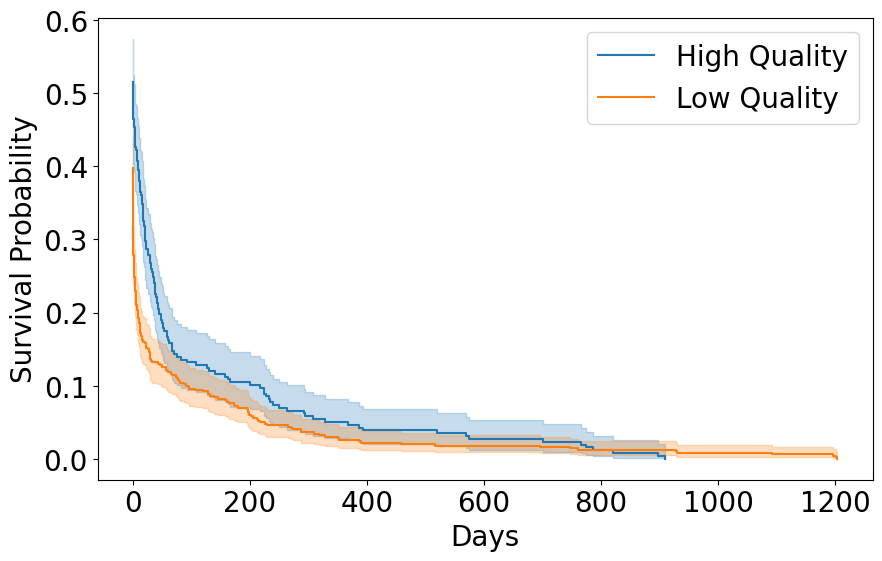

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.61 <0.005      9.80


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          10.61 <0.005      9.80

In [4]:
# Convert date format
df['created_at'] = pd.to_datetime(df['created_at'])
df['lastModified'] = pd.to_datetime(df['lastModified'])

# Calculate survival time (in days)
df['model_duration'] = (df['lastModified'] - df['created_at']).dt.days

# Group by Quality: High and Low
high_quality = df[df['Quality'] == 'High']
low_quality = df[df['Quality'] == 'Low']

# Kaplan-Meier survival analysis
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

kmf_high.fit(high_quality['model_duration'], label='High Quality')
kmf_low.fit(low_quality['model_duration'], label='Low Quality')

# Plot survival curves
plt.figure(figsize=(10, 6))
kmf_high.plot_survival_function()
kmf_low.plot_survival_function()

#plt.title('Kaplan-Meier Survival Curve by Quality')
plt.xlabel('Days', fontsize=20)
plt.ylabel('Survival Probability', fontsize=20)
plt.legend(fontsize=20)

# Set the font size of the tick labels
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('Kaplan-Meier(model).pdf', format='pdf', bbox_inches='tight')

plt.show()

# Perform log-rank test
results = logrank_test(
    high_quality['model_duration'], 
    low_quality['model_duration']
)

# Print test results
print(results)
results.print_summary()

In [5]:
results.p_value

0.0011253247127922298

In [6]:
median_survival_high = kmf_high.median_survival_time_
median_survival_low = kmf_low.median_survival_time_

In [7]:
median_survival_high

1.0

In [8]:
median_survival_low

0.0

In [9]:
time_at_80_high = kmf_high.percentile(0.2)
time_at_80_low = kmf_low.percentile(0.2)

D:\python virtual environment\my_env2\lib\site-packages\lifelines\fitters\__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
D:\python virtual environment\my_env2\lib\site-packages\lifelines\fitters\__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(


In [10]:
time_at_80_high

45.0

In [11]:
time_at_80_low

8.0

In [12]:
survival_at_time_zero_high = kmf_high.predict(0)
survival_at_time_zero_low = kmf_low.predict(0)

In [13]:
survival_at_time_zero_high

0.5155038759689923

In [14]:
survival_at_time_zero_low

0.3980000000000001